# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# Code Here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
!pip install palmerpenguins
from palmerpenguins import load_penguins
import numpy as np

df = load_penguins()
df = df.dropna().copy()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
# dummify all variables that require this
species_dummies  = pd.get_dummies(df['species'], prefix='species')
island_dummies = pd.get_dummies(df['island'], prefix='island')
sex_dummies = pd.get_dummies(df['sex'], prefix='sex')
df = pd.concat([df, species_dummies, island_dummies, sex_dummies], axis=1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,True,False,False,False,False,True,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,True,False,False,False,False,True,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,True,False,False,False,False,True,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,True,False,False,False,False,True,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,True,False,False,False,False,True,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
# your best multiple linear regression model from before
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['bill_depth_mm', 'species', 'island', 'sex'], axis=1)
y = df['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [ ]:
#kNN Models
k_values = [3, 7]
knn_models = {
    'k3': Pipeline([
        ('ss', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=3))
    ]),
    'k7': Pipeline([
        ('ss', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=7))
    ])
}


In [ ]:
# decision tree model
decision_tree_model = Pipeline([
    ('ss', StandardScaler()),
    ('tree', DecisionTreeRegressor())
])


In [ ]:
# fit the models
linear_regression_model.fit(X_train, y_train)
knn_models['k3'].fit(X_train, y_train)
knn_models['k7'].fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('tree', DecisionTreeRegressor())])

In [ ]:
# calculate errors
models = {
    'Linear Regression': linear_regression_model,
    'KNN (k=3)': knn_models['k3'],
    'KNN (k=7)': knn_models['k7'],
    'Decision Tree': decision_tree_model}

training_errors = {}
test_errors = {}

In [ ]:
# Linear regression
y_train_pred = linear_regression_model.predict(X_train)
y_test_pred = linear_regression_model.predict(X_test)
training_errors['Linear Regression'] = mean_squared_error(y_train, y_train_pred)
test_errors['Linear Regression'] = mean_squared_error(y_test, y_test_pred)

In [ ]:
# kNN 7
y_train_pred = knn_models['k7'].predict(X_train)
y_test_pred = knn_models['k7'].predict(X_test)
training_errors['KNN (k=7)'] = mean_squared_error(y_train, y_train_pred)
test_errors['KNN (k=7)'] = mean_squared_error(y_test, y_test_pred)

In [ ]:
# kNN 3
y_train_pred = knn_models['k3'].predict(X_train)
y_test_pred = knn_models['k3'].predict(X_test)
training_errors['KNN (k=3)'] = mean_squared_error(y_train, y_train_pred)
test_errors['KNN (k=3)'] = mean_squared_error(y_test, y_test_pred)

In [ ]:
# decision tree
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)
training_errors['Decision Tree'] = mean_squared_error(y_train, y_train_pred)
test_errors['Decision Tree'] = mean_squared_error(y_test, y_test_pred)

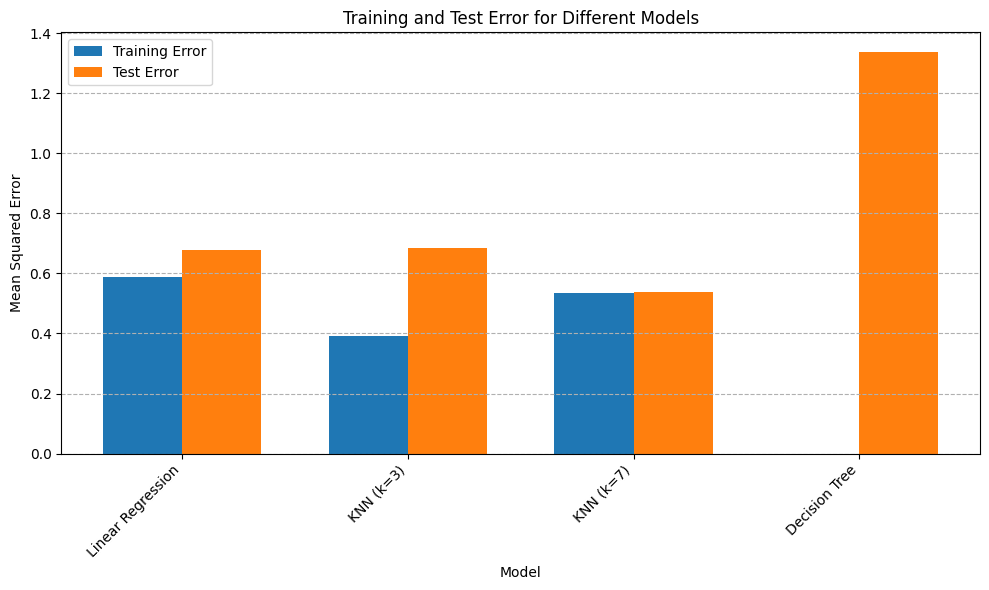

The best model based on test error is: KNN (k=7) with MSE: 0.54


In [ ]:
import matplotlib.pyplot as plt

# plotting errors
fig, ax = plt.subplots(figsize=(10, 6))

model_names = list(models.keys())
error_types = ['Training Error', 'Test Error']

bar_width = 0.35
index = np.arange(len(model_names))

training_errors_list = [
    training_errors['Linear Regression'],
    training_errors['KNN (k=3)'],
    training_errors['KNN (k=7)'],
    training_errors['Decision Tree']
]

test_errors_list = [
    test_errors['Linear Regression'],
    test_errors['KNN (k=3)'],
    test_errors['KNN (k=7)'],
    test_errors['Decision Tree']
]

bar1 = ax.bar(index - bar_width/2, training_errors_list, bar_width, label='Training Error')
bar2 = ax.bar(index + bar_width/2, test_errors_list, bar_width, label='Test Error')

ax.set_xlabel('Model')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Training and Test Error for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Determine the best model based on test error
best_model_name = min(test_errors, key=test_errors.get)
print(f"The best model based on test error is: {best_model_name} with MSE: {test_errors[best_model_name]:.2f}")